In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


In [ ]:
# read data and merge the train and test with features

coded_id = pd.read_csv("users/coded_ids.csv")
features = pd.read_csv("users_features/features.csv")
users = pd.merge(features, coded_id, on='user_id', how='left')

train = pd.read_csv("users/coded_ids_labels_train.csv")
test = pd.read_csv("users/coded_ids_labels_test.csv")
train = pd.merge(users, train, on='coded_id', how='right')
test = pd.merge(users, test, on='coded_id', how='right')

In [ ]:
train.shape

(686, 125)

In [ ]:
test.shape

(81, 124)

In [ ]:
#cleaning train dataset

#remove columns with na values
nacolumns = train.columns[train.isna().any()].tolist()
train.drop(columns = nacolumns,inplace=True)
train.dropna(axis=0,inplace=True)

#remove unwanted category columns like time and IDs
unwanted = ["default_profile","default_profile_image","avg_intertweet_times","date_newest_tweet","lang","min_intertweet_times","std_nb_symbols_per_tweet","std_nb_symbols_per_word_in_the_tweet","date_oldest_tweet","max_intertweet_times","max_nb_symbols_per_tweet","max_nb_symbols_per_word_in_the_tweet","std_intertweet_times","user_id","coded_id"]
train.drop(columns=unwanted,inplace=True)

#remove columns like 
allzero_cols = list(train.loc[:,(train==0).all()].columns)
train.drop(columns=allzero_cols,inplace=True)


In [ ]:
#cleaning test set

#remove columns with na values
nacolumns = test.columns[test.isna().any()].tolist()
test.drop(columns = nacolumns,inplace=True)
test.dropna(axis=0,inplace=True)

#remove unwanted category columns like time and IDs
unwanted = ["default_profile","default_profile_image","avg_intertweet_times","date_newest_tweet","lang","min_intertweet_times","std_nb_symbols_per_tweet","std_nb_symbols_per_word_in_the_tweet","date_oldest_tweet","max_intertweet_times","max_nb_symbols_per_tweet","max_nb_symbols_per_word_in_the_tweet","std_intertweet_times","user_id","coded_id"]
test.drop(columns=unwanted,inplace=True)

#remove columns like 
allzero_cols = list(test.loc[:,(test==0).all()].columns)
test.drop(columns=allzero_cols,inplace=True)


In [ ]:
#split data into x features and labels
x = train.iloc[:,:124]

#min max scaling for PCA
scaler = MinMaxScaler()
data = scaler.fit_transform(x)

#PCA
pca = PCA(n_components = 0.95) #using 0.95% variance
pca.fit(data)
x = pca.transform(data)
test = scaler.fit_transform(test)

y = train.label

In [ ]:
x.shape

(686, 45)

In [ ]:
y.value_counts()

0    568
1    118
Name: label, dtype: int64

In [ ]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y ,stratify=y, test_size=0.15,random_state=1)

In [ ]:
def grid_search(model,params):
  skf = StratifiedKFold(n_splits=10)
  gs = GridSearchCV(model, cv=skf, param_grid=params, return_train_score=True)
  gs.fit(x_train, y_train)
  print("best params = ",gs.best_params_)
  print("best score =",gs.best_score_)

In [ ]:
#naives bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
params = {"var_smoothing":[1,0.1,1e-2]}

grid_search(model,params)

best params =  {'var_smoothing': 0.01}
best score = 0.8764465225014613


In [ ]:
#naives bayes test
model = GaussianNB(var_smoothing=0.01)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print('Model train accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print(classification_report(y_test, y_pred_test))

Model train accuracy score: 0.8816
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        85
           1       0.88      0.78      0.82        18

    accuracy                           0.94       103
   macro avg       0.91      0.88      0.89       103
weighted avg       0.94      0.94      0.94       103



In [ ]:
#knn

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
params = {"n_neighbors":[i for i in range(1,20)]}

grid_search(model,params)

best params =  {'n_neighbors': 3}
best score = 0.9554354178842781


In [ ]:
#knn test

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print('Model train accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print(classification_report(y_test, y_pred_test))

Model train accuracy score: 0.9708
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        85
           1       0.94      0.83      0.88        18

    accuracy                           0.96       103
   macro avg       0.95      0.91      0.93       103
weighted avg       0.96      0.96      0.96       103



In [ ]:
#svm

from sklearn.svm import SVC

model = SVC()
params = {"C":[0.1,1,10],
          "kernel":["linear", "poly", "rbf", "sigmoid"]}
grid_search(model,params)

best params =  {'C': 10, 'kernel': 'rbf'}
best score = 0.9657510227936879


In [ ]:
#svm test

model = SVC(C=10,kernel="rbf")
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print('Model train accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print(classification_report(y_test, y_pred_test))

Model train accuracy score: 1.0000
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        85
           1       1.00      0.89      0.94        18

    accuracy                           0.98       103
   macro avg       0.99      0.94      0.96       103
weighted avg       0.98      0.98      0.98       103



In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
params = {"criterion":["gini","entropy"],
          "max_depth":range(1,10),
          "min_samples_split":range(2,10),
          "min_samples_leaf":range(1,5)}
grid_search(model,params)

best params =  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 8}
best score = 0.9400350672121565


In [ ]:
#decision tree test

model = DecisionTreeClassifier(criterion="entropy",max_depth=9,min_samples_leaf=3,min_samples_split=8)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print('Model train accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print(classification_report(y_test, y_pred_test))

Model train accuracy score: 0.9811
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        85
           1       1.00      0.72      0.84        18

    accuracy                           0.95       103
   macro avg       0.97      0.86      0.91       103
weighted avg       0.95      0.95      0.95       103



In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_search(model,params)

best params =  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
best score = 0.9435125657510227


In [ ]:
#random forest test

model = RandomForestClassifier(criterion="entropy",max_depth=8,max_features="sqrt",n_estimators=200)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print('Model train accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print(classification_report(y_test, y_pred_test))

Model train accuracy score: 1.0000
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        85
           1       1.00      0.83      0.91        18

    accuracy                           0.97       103
   macro avg       0.98      0.92      0.95       103
weighted avg       0.97      0.97      0.97       103



In [ ]:
#MLP
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder

model = Sequential()
model.add(Dense(50, input_dim=45, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
59/59 [==============================] - 1s 1ms/step - loss: 0.6288 - accuracy: 0.7680
Epoch 2/50
59/59 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.8928
Epoch 3/50
59/59 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.9234
Epoch 4/50
59/59 [==============================] - 0s 1ms/step - loss: 0.2651 - accuracy: 0.9359
Epoch 5/50
59/59 [==============================] - 0s 1ms/step - loss: 0.1915 - accuracy: 0.9441
Epoch 6/50
59/59 [==============================] - 0s 1ms/step - loss: 0.1635 - accuracy: 0.9531
Epoch 7/50
59/59 [==============================] - 0s 1ms/step - loss: 0.1290 - accuracy: 0.9652
Epoch 8/50
59/59 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 0.9526
Epoch 9/50
59/59 [==============================] - 0s 1ms/step - loss: 0.1111 - accuracy: 0.9731
Epoch 10/50
59/59 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9778
Epoch 11/50
59/59 [

In [ ]:
y_pred_train = model.predict_classes(x_train)
y_pred_test = model.predict_classes(x_test)
print('Model train accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print(classification_report(y_test, y_pred_test))

Model train accuracy score: 1.0000
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        85
           1       0.89      0.89      0.89        18

    accuracy                           0.96       103
   macro avg       0.93      0.93      0.93       103
weighted avg       0.96      0.96      0.96       103



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


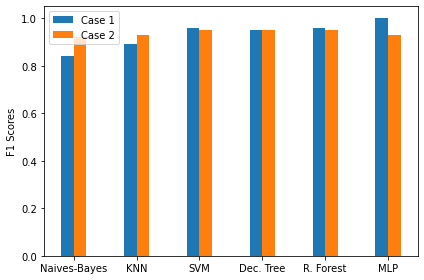

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Naives-Bayes', 'KNN', 'SVM', 'Dec. Tree', 'R. Forest', "MLP"]
c1 = [0.84,0.89,0.96,0.95,0.96,1.00]
c2 = [0.92,0.93,0.95,0.95,0.95,0.93]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, c1, width, label='Case 1')
rects2 = ax.bar(x + width/2, c2, width, label='Case 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.savefig("f1score", bbox_inches='tight',dpi = 200)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 686 samples in 0.003s...
[t-SNE] Computed neighbors for 686 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 686 / 686
[t-SNE] Mean sigma: 0.574296
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.764511
[t-SNE] KL divergence after 300 iterations: 0.928890


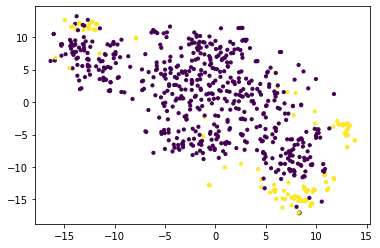

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

a = tsne_results[:,0]
b = tsne_results[:,1]
plt.scatter(a,b,c=y,s=10)

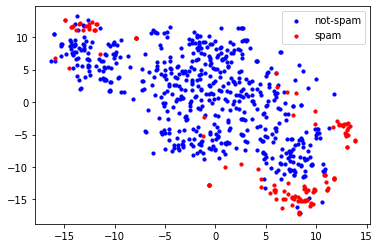

In [ ]:
df = pd.DataFrame()
df["a"] = a
df["b"] = b
df["y"] = y

aa = df[df.y==0]
bb = df[df.y==1]

plt.scatter(aa.a,aa.b,c="b",s=10,label="not-spam")
plt.scatter(bb.a,bb.b,c="r",s=10,label="spam")
plt.legend()
plt.savefig("tsnec3", bbox_inches='tight',dpi = 200)